# Real Estate Price Predictor Model

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282258,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705243,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.883000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.620500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

# it means , I want to see my graph here itself

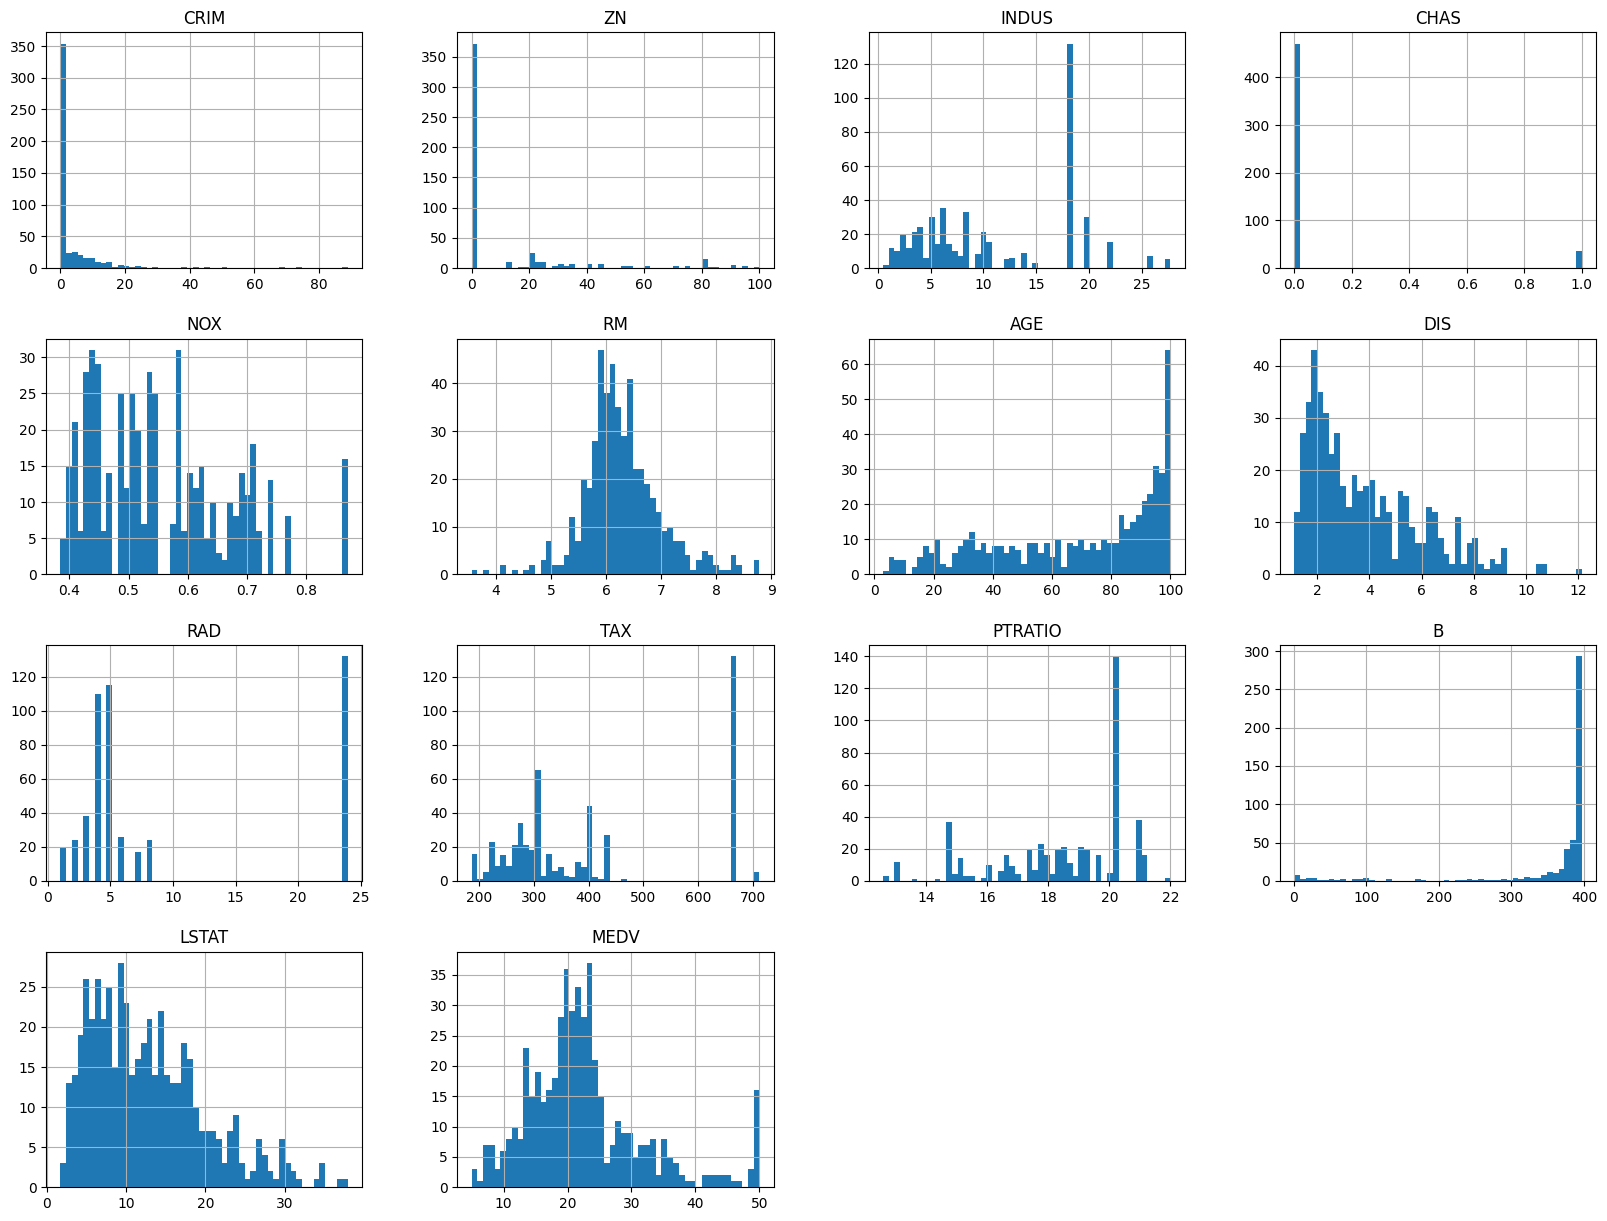

In [8]:
# for ploting histogram

import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize=(20,15) )
plt.show()

# Train-Test Splitting

In [9]:
# For learning purpose - it can be also done using sklearn

import numpy as np

def split_train_test(data , test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[ : test_set_size]
    train_indices = shuffled[ test_set_size : ]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [10]:
train_set , test_set = split_train_test(housing , 0.2) 

"""
spliting data in 80 & 20 Ration. 

80% = training data
20% = testing data

hence, test_ratio = 20% == 0.2

"""


[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

'\nspliting data in 80 & 20 Ration. \n\n80% = training data\n20% = testing data\n\nhence, test_ratio = 20% == 0.2\n\n'

In [11]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [12]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing, test_size = 0.2 , random_state = 42)

In [13]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [14]:
"""

hum chahte, hamara train set,  aur test set saare population ko model mei set kre.

ab yhn pe, eg = CHAS has 1 & 0.

ab ho skta hai, train mei 1 aaye hi naa. sirf 0 aaye. toh model ko pata nai chalega, ki CHAS mei 1 bhi ho skta hai. Kyuki abhi toh sirf 0 hai. 
ab testing mei 1 aaya, toh model to confuse hojaega, ki CHAS mei 1 khn se aaya. usme toh sirf 0 hota hai.

Hence, iss problem ko solve krne ke liye hum use karenge " Statified Sampling "

"""

'\n\nhum chahte, hamara train set,  aur test set saare population ko model mei set kre.\n\nab yhn pe, eg = CHAS has 1 & 0.\n\nab ho skta hai, train mei 1 aaye hi naa. sirf 0 aaye. toh model ko pata nai chalega, ki CHAS mei 1 bhi ho skta hai. Kyuki abhi toh sirf 0 hai. \nab testing mei 1 aaya, toh model to confuse hojaega, ki CHAS mei 1 khn se aaya. usme toh sirf 0 hota hai.\n\nHence, iss problem ko solve krne ke liye hum use karenge " Statified Sampling "\n\n'

# We will perform statified sampling based on CHAS ( has value as 0 & 1)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

                            # (n_split , test_size , train_size , random_state)
split = StratifiedShuffleSplit( n_splits = 1 , test_size = 0.2 , random_state = 42)
        # number of re-shuffling & splitting iteration , proportion of dataset to include in test split , random_state is the seed used by the random no.

for train_index , test_index in split.split( housing , housing['CHAS'] ):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

"""
housing.loc[train_index] ==>

eg: Housing is a giant excel & train_index the list of rows number
Hey pandas, give me the rows from the data housing with help of train_index rows number list 

"""


'\nhousing.loc[train_index] ==>\n\neg: Housing is a giant excel & train_index the list of rows number\nHey pandas, give me the rows from the data housing with help of train_index rows number list \n\n'

In [16]:
strat_train_set.info()
strat_train_set['CHAS'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       398 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [19]:
housing = strat_train_set.copy()

# A deep copy has been made & stored in Housing variable

# Looking for Correlations

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

# will calculate correlation based on MEDV
# Here we are identifying, which feature is most positvely & negatively correlated

# If we will increase MEDV then, offc price will increase. Same goes for RM

MEDV       1.000000
RM         0.682057
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

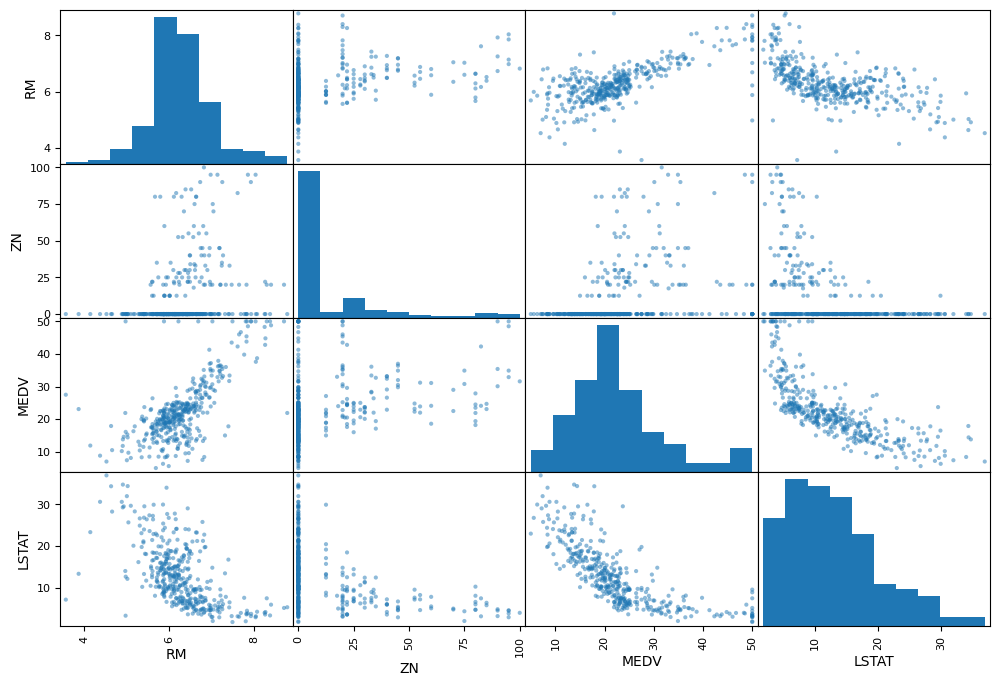

In [22]:
from pandas.plotting import scatter_matrix

# we will only plot for though column, were we will feel it is either positively or negatively correlated
attributes = ['RM' , 'ZN' , 'MEDV' , 'LSTAT']
scatter_matrix(housing[attributes] , figsize = (12 , 8))

<Axes: xlabel='RM', ylabel='MEDV'>

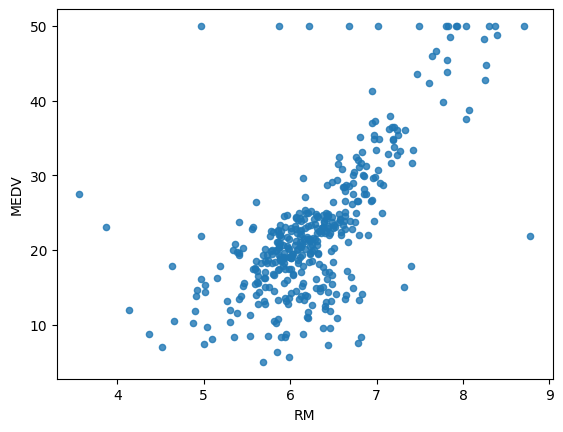

In [23]:
housing.plot(kind ="scatter" , x="RM" , y="MEDV" , alpha=0.8)

# Trying out Atrribute Combinations

In [24]:
# Making new Attribute and adding it to housing dataset = Tax per Room

# housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [26]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.682057
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [27]:
# TAXRM we made, is highly negitavely correlated

# housing.plot(kind="scatter" , x="TAXRM" , y="MEDV" , alpha=0.8)

In [28]:
# Seperating Features & Labels

housing = strat_train_set.drop("MEDV" , axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [29]:
# for option 1
housing.dropna(subset = ['RM'])

# housing data is not change, untill unless we will not write , inplace = true. The original dataset will not change. 
    # we are just making a copy.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [30]:
# For option 2.
housing.drop("RM" , axis = 1) 

# axis = 1 ---> for column.
# No RM column, and also the original data set will remain same. it will not change

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [31]:
# For option 3

median = housing["RM"].median()

In [32]:
housing["RM"].fillna(median)

# Note = at place of No value, we habe added median value of RM to it.

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
# If we have made this change in the training set, then we will make the same changes in the test set.

# If in future we get feature where we will NA in the dataset, then we will have to utilize the same calculated RM median. Toh isse Sambhal ke rkhna hoga.

In [34]:
housing.describe()  # Before we started the inputer

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,398.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276852,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716368,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.875750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(housing) 
# fitting imputer in housing data

"""
The SimpleImputer in scikit-learn is used to fill in (impute) missing values in a dataset so you can 
use it for machine learning models, which generally don't accept missing (NaN) values. ( np.nan )

1. Mean - default value = Replaces missing values with the mean of the column
2. Median = Replaces missing values with the median of the column
3. Most frequent = Replaces missing values with the most common value
4. Constant = Fills all missing values with a specific value you define

"""


"\nThe SimpleImputer in scikit-learn is used to fill in (impute) missing values in a dataset so you can \nuse it for machine learning models, which generally don't accept missing (NaN) values. ( np.nan )\n\n1. Mean - default value = Replaces missing values with the mean of the column\n2. Median = Replaces missing values with the median of the column\n3. Most frequent = Replaces missing values with the most common value\n4. Constant = Fills all missing values with a specific value you define\n\n"

In [36]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [37]:
X = imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X , columns = housing.columns)

In [39]:
housing_tr.describe().head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.275844,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711062,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500


# Scikit-Learn Design

# Creating Pipeline 

# Feature Scaling

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy="median")),
    #    ....add as many as you want in your pipeline
    ('std_scaler' , StandardScaler())
])

In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

"""
my_pipeline.fit(housing)
housing_num_tr = my_pipeline(housing)

"""

# Jo hamara data tha, housing wala main data tha. Uspe std scaler lagaya hai aur phir usko numpy array mei convert kr dega.

In [42]:
housing_num_tr # it is a numpy aaray. 
# as predictor in sklearn take numpy array in input not pandas pd data

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [43]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for our ML project

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [45]:
some_data = housing.iloc[ : 5]

In [46]:
some_labels = housing_labels.iloc[ : 5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.676, 25.526, 16.24 , 23.46 , 23.503])

# Kya ye shai hai prediction?

list(some_labels)

# Evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_num_tr)

mse = mean_squared_error(housing_labels , housing_predictions)

rmse = np.sqrt(mse)

In [50]:
rmse

# It is overfitting of training data.
# model acha nai hai. 

np.float64(1.1699809362075553)

Linear regression se better decision tree kaam kr rah, as it is overfitting the model

# Using better evaluation technique - Cross Validation

In [51]:
# 1 2 3 4 5 6 7 8 9 10

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , housing_num_tr , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)

rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([2.84807994, 2.69835292, 4.48704484, 2.63463906, 3.65873798,
       2.6490858 , 4.65060051, 3.29640778, 3.40053887, 3.27389479])

In [53]:
def print_scores(scores):
    print("Scores: " , scores)
    print("Mean: " , scores.mean())
    print("Standard deviation: " , scores.std())

In [54]:
print_scores(rmse_scores)

Scores:  [2.84807994 2.69835292 4.48704484 2.63463906 3.65873798 2.6490858
 4.65060051 3.29640778 3.40053887 3.27389479]
Mean:  3.3597382476269715
Standard deviation:  0.6906237340300497


# sklearn.Joblib save our Model

# Saving the Model

In [55]:
# saving the model using joblib

from joblib import dump,load

dump(model , "RealStatePricePredictor.joblib")

['RealStatePricePredictor.joblib']

# Testing the model on test data

In [59]:
X_test = strat_test_set.drop("MEDV" , axis = 1) # ye price tha, ye hamara label tha
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_predictions, list(Y))

[24.251 11.506 25.275 21.938 18.487 15.051 19.789 14.564 30.972 40.045
 19.945 11.557 24.884 28.029 19.684 10.79  31.248 14.461 23.61  19.115
 19.887 18.125 17.493 22.083 18.55  30.513 16.194 32.644  9.089 33.745
 24.083 21.282 23.063 11.007 20.986 11.254 42.371 24.23  23.826 41.388
 23.891 29.646 20.793 20.741 19.43  33.53  43.848 20.082 20.241 21.62
 21.52  14.873 21.229 15.118 24.538 33.15  42.696 28.284 19.217 20.838
 47.394 10.171 18.777 27.644 14.825 32.969 19.512 18.025 19.071 33.623
 27.52  22.86  21.244 22.612 35.126 12.748 15.933 20.147 20.964 21.345
 22.599 21.353 14.226 22.898 20.478 21.145 13.829 21.471 22.127 23.318
 18.707 27.711  7.291 25.574 18.79  30.005 19.771 31.213 14.567 26.288
 20.903 20.225] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [58]:
final_rmse

np.float64(2.807715018916801)

In [60]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23633958, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])